# Computing the mean daily energy for each month 

Using data from 2000-2020 

## Setup 🔧

In [1]:
import os
import h5py
import time
import datetime
import numpy as np
import matplotlib as mpl
import geopandas  as geopd
import matplotlib.pyplot as plt

import lib.datos as admin_datos
import lib.panel as PV

PATH_DATOS     = "Data/data.h5"
PATH_SHAPEFILE = "Data/Shapefiles/shape_file.shp"

# for ploting the political division of mexican territory
shapefile = geopd.read_file(PATH_SHAPEFILE)

# This object will help us to manage the data easier.
EXPLORADOR = admin_datos.Explorador()

# Object that describe the specs of a solar panel.
PANEL = PV.PanelSolar(
    G_ref = 1000,       # W/m2
    P_ref = 580 / 2.79, # W/m2, This panel have 2.79 m2
    T_ref = 25,         # °C
    CT    = -0.35 ,     # %/°C
    NOCT  = 45   ,      # °C
    modelo = "JAM78S30_580/MR"
)

# A dictionary with the names and start-end indexes of every month.
MONTHS = {
    "January":(0,31),
    "February":(31,59),
    "March":(59,90),
    "April":(90,121),
    "May":(121,151),
    "June":(151,181),
    "July":(181,212),
    "August":(212,243),
    "September":(243,273),
    "October":(273,304),
    "November":(304,334),
    "December":(334,365),   
}

## Ploting the studied region 🌎

Number of points studied: 731.0



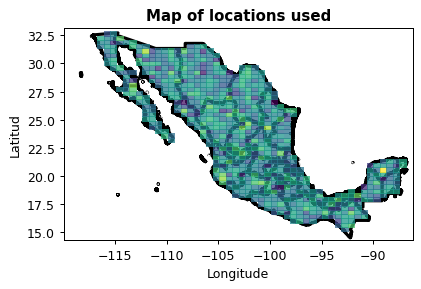

In [2]:
# Points sampled that are part of mexican territory.
mask = EXPLORADOR.mask
print(f"Number of points studied: {np.sum(mask)}")

# Grid coordinates for each of the cells
x = EXPLORADOR.X
y = EXPLORADOR.Y

# Assigning a random color for each of the grid cells
z = np.random.normal(size=(50,50))*mask
z[z == 0] = np.nan

fig, ax = plt.subplots(1,figsize=(5,4),dpi=90)

# Plot mexican politic division
shapefile.plot(ax=ax,color='white', edgecolor='black',linewidth=2.5)

ax.pcolor(x,y,z,alpha=0.75)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitud")
ax.set_title("Map of locations used",weight="bold")
print("")

## Getting the data 📈

In [3]:
dataset = []

# Each key  hold a studied data point
for key in EXPLORADOR.lista_keys:
    
    dataset_lugar = []
    # The data is separated by year
    for year in range(2000,2020):
        
        yearly_data = EXPLORADOR.extraer_datos(año=year,key=key)
        GHI  = yearly_data.GHI
        Temp = yearly_data.temp
        
        # Computing the power porduce by the solar panel
        energy = PANEL.potencia_producida(GHI,Temp)
        
        dataset_lugar.append(energy)
        
    dataset.append(dataset_lugar)
        
dataset = np.array(dataset)
print(dataset.shape)

(731, 20, 8760)


## Computing the daily energy

In [4]:
dataset_energy = dataset.reshape(731,20,365,24)
dataset_energy = np.trapz(dataset_energy,dx=1,axis=3)

print(dataset_energy.shape)

(731, 20, 365)


## Calculating the mean of each month

In [15]:
dataset_mean_energy = np.mean(dataset_energy,axis=1)

monthly_grids = []
for mes , (idx_o,idx_f) in MONTHS.items():
    
    monthly_mean_energy = dataset_mean_energy[:,idx_o:idx_f]
    monthly_mean_energy = np.mean(monthly_mean_energy,axis=1) / 1000
    monthly_grids.append(EXPLORADOR.lista2grid(monthly_mean_energy))

## Generating the plot

January graph complete!
February graph complete!
March graph complete!
April graph complete!
May graph complete!
June graph complete!
July graph complete!
August graph complete!
September graph complete!
October graph complete!
November graph complete!
December graph complete!


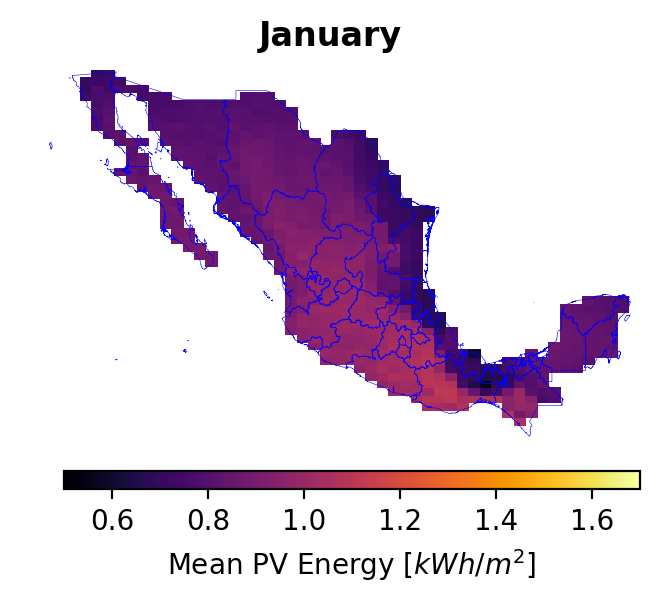

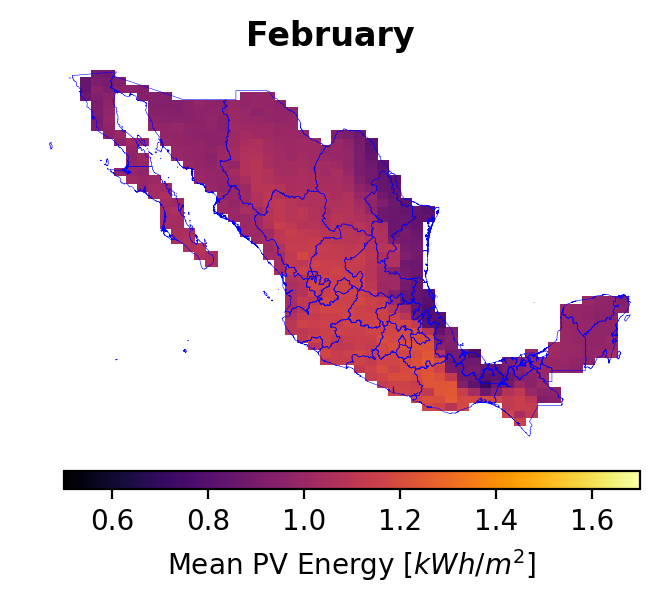

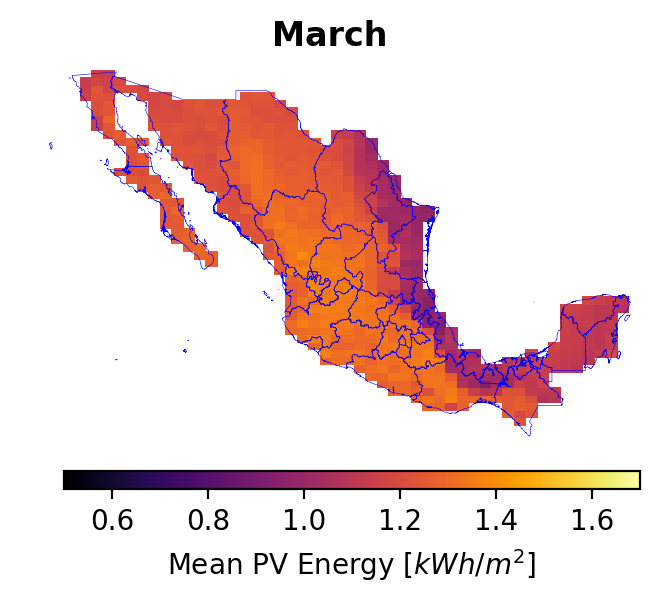

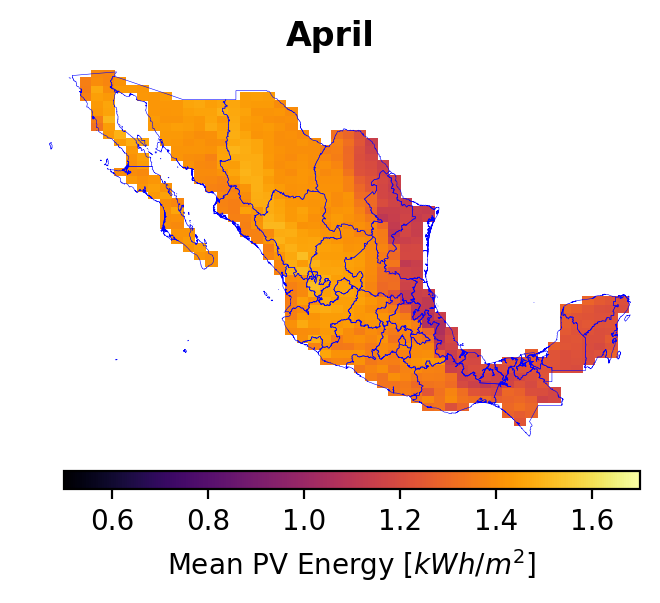

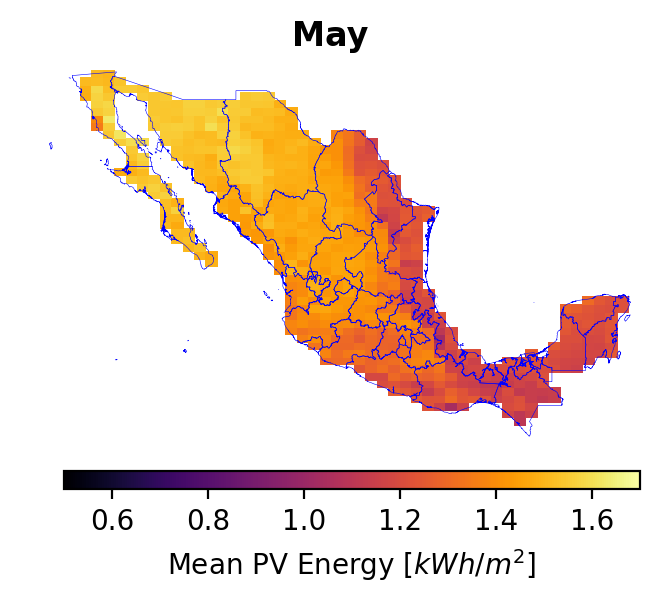

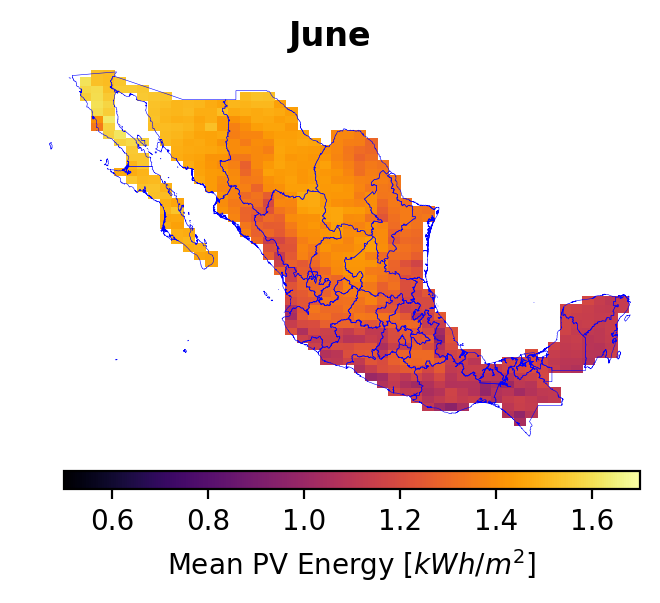

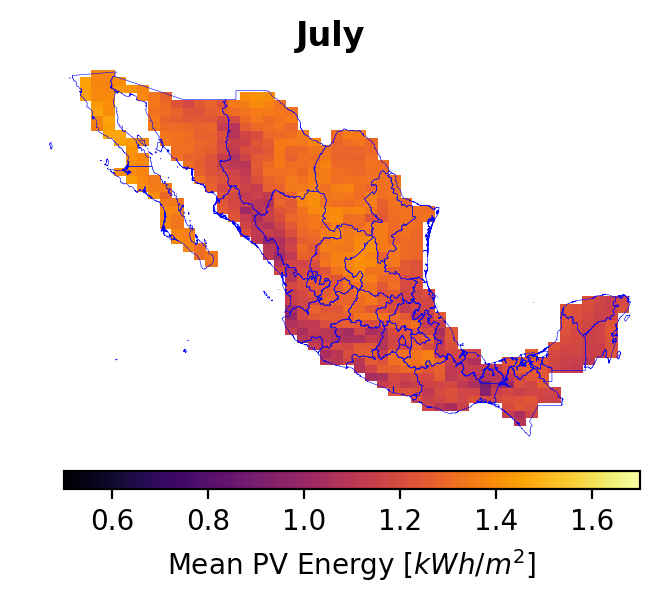

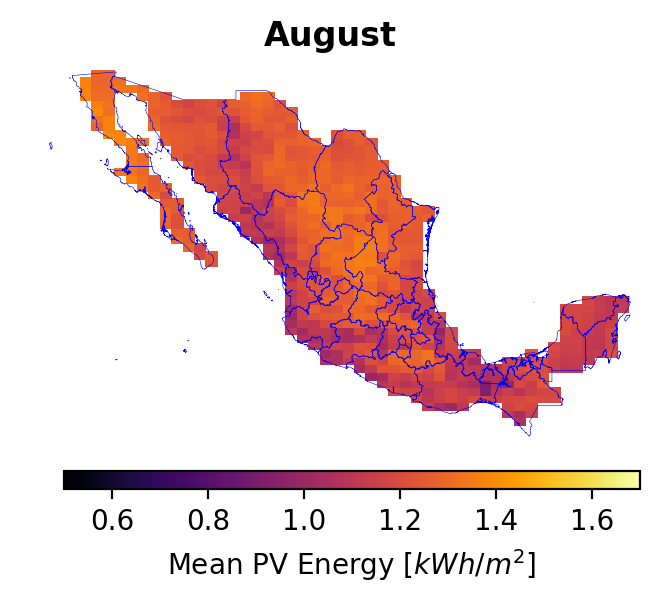

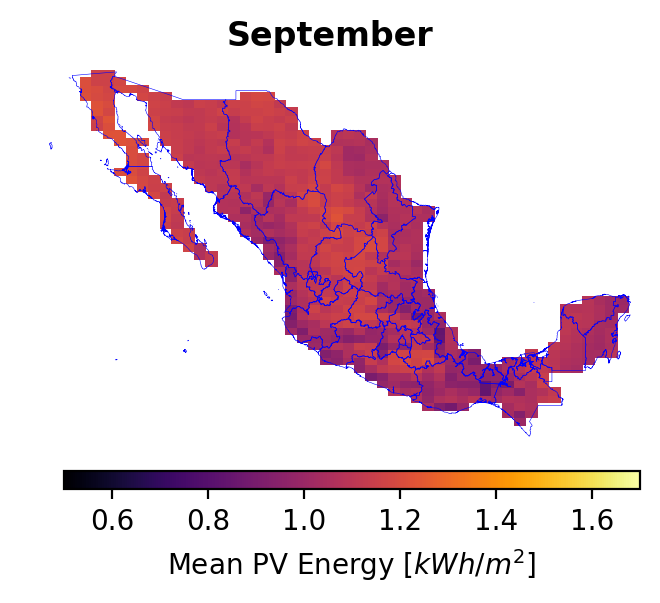

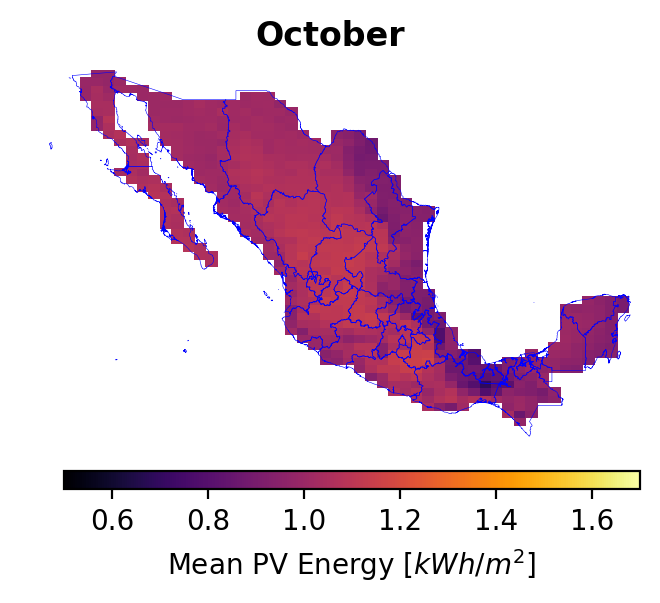

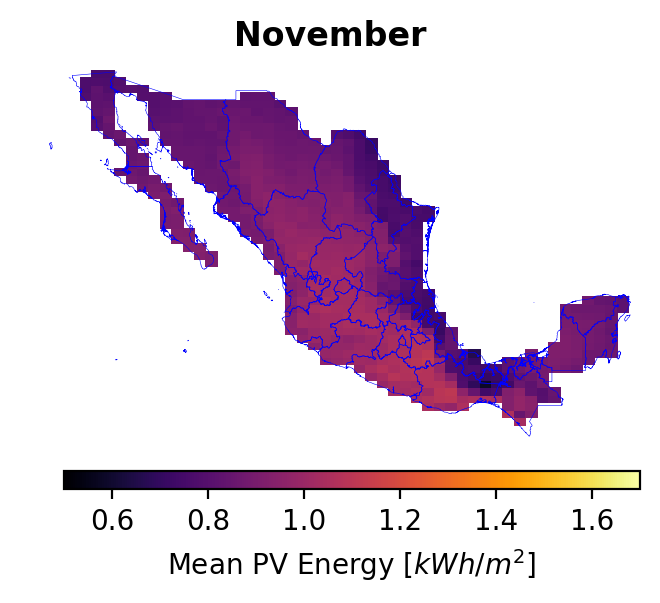

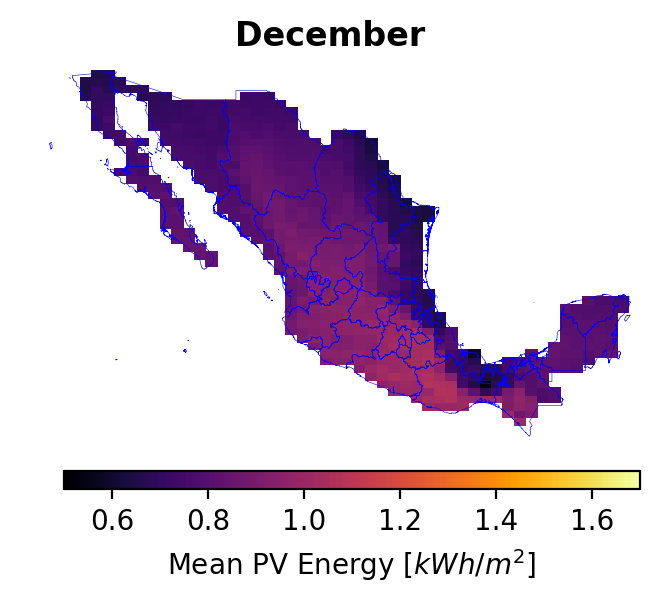

In [22]:
def plot(array,titulo="",vmin=None,vmax=None,cbar_label="PV Energy [$kWh/m^2$]",output="output/output.jpg"):
    
    array[array == -1] = np.nan
    x , y = EXPLORADOR.X , EXPLORADOR.Y
    
    fig , ax = plt.subplots(1,1,figsize=(4,3),dpi=200)
    ax.set_title(titulo,weight="bold")
    
    if vmin is None or vmax is None:
        pcolor = ax.pcolor(x,y,array,cmap="inferno",alpha=1)
    else:
        pcolor = ax.pcolor(x,y,array,cmap="inferno",alpha=1,vmin=vmin,vmax=vmax)
    shapefile.plot(ax=ax,color="none", edgecolor='blue',linewidth=0.2)
    ax.axis("off")
    ax.grid("off")
    
    pos_o_fig = 0.18
    pos_f_fig = 0.9
    mid_pos_fig = pos_o_fig + (pos_f_fig - pos_o_fig) / 2

    # Obtenemos posición inicial de la barra
    tamaño_celda = 0.15
    pos_o = pos_o_fig
    
    # Obtenemos tamaño de la barra
    tamaño_barra = pos_f_fig - pos_o_fig  

    # Colocamos barra customizada
    ax_cbar = fig.add_axes([pos_o,0.1,tamaño_barra,0.03])
    cb = plt.colorbar(pcolor, cax=ax_cbar, orientation='horizontal',cmap="inferno",label=cbar_label)
    plt.savefig(output,bbox_inches='tight')
    
    

for i,month in enumerate(MONTHS.keys()):
    plot(monthly_grids[i],titulo=month,output=f"output/{i}.jpg",vmin=0.5,vmax=1.7,cbar_label=r"Mean PV Energy [$kWh/m^2$]")
    print(f"{month} graph complete!")